In [20]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# import datas to compare
data1_url = 'android_data/sensor_database28-SensorData.csv'
data2_url = 'dataset/ups_12/sub_1.csv'

data1 = pd.read_csv(data1_url, sep=';')
data2 = pd.read_csv(data2_url)

data1 = data1.dropna()
data2 = data2.dropna()

data1 = data1.drop(columns=['id'])
data2 = data2.drop(columns=['Unnamed: 0'])

In [22]:
data1.head()

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Z,User Acceleration Y
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0085,-0.0065,-0.0005,5.0219,0.5073,-8.7601
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0085,-0.0065,-0.0005,5.0219,0.5073,-8.7601
2,0.0000,0.0000,0.0000,4.8503,-8.5086,0.4984,0.0085,-0.0065,-0.0005,5.0219,0.5073,-8.7601
3,0.0000,0.0000,0.0000,4.8503,-8.5086,0.4984,0.0069,-0.0012,0.0013,5.0369,0.4875,-8.7338
4,0.0000,0.0000,0.0000,4.8503,-8.5086,0.4984,0.0069,-0.0012,0.0013,5.0369,0.4875,-8.7338


In [23]:
data2.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.8385,-0.9016,0.1897,0.4613,0.7843,-0.4147,0.1272,2.8332,-0.2272,-0.0975,-0.0118,0.0794
1,0.9012,-0.9003,0.1778,0.4872,0.7835,-0.3856,0.0768,4.1651,-0.2816,0.3756,0.4922,0.4497
2,0.9931,-0.9150,0.1857,0.5109,0.7925,-0.3330,-0.7941,3.8792,-0.4881,0.0616,0.2608,0.4896
3,1.0295,-0.9219,0.1711,0.5179,0.7968,-0.3113,0.7019,1.7288,-0.5390,-0.1080,0.1337,-0.0242
4,1.0520,-0.9279,0.1562,0.5207,0.8003,-0.2973,-0.2339,2.0310,-0.4498,-0.0254,-0.0955,0.2760


In [24]:
# Convert string with exponent to float64 of data2
for column in data1.columns:
    if data1[column].dtype != 'float64':
        data1[column] = data1[column].apply(lambda x: float(x.lower().replace(',', '.')))

In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Attitude Roll        506 non-null    float64
 1   Attitude Pitch       506 non-null    float64
 2   Attitude Azimuth     506 non-null    float64
 3   Gravity X            506 non-null    float64
 4   Gravity Y            506 non-null    float64
 5   Gravity Z            506 non-null    float64
 6   Rotation Rate X      506 non-null    float64
 7   Rotation Rate Y      506 non-null    float64
 8   Rotation Rate Z      506 non-null    float64
 9   User Acceleration X  506 non-null    float64
 10  User Acceleration Z  506 non-null    float64
 11  User Acceleration Y  506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1066 non-null   float64
 1   attitude.pitch      1066 non-null   float64
 2   attitude.yaw        1066 non-null   float64
 3   gravity.x           1066 non-null   float64
 4   gravity.y           1066 non-null   float64
 5   gravity.z           1066 non-null   float64
 6   rotationRate.x      1066 non-null   float64
 7   rotationRate.y      1066 non-null   float64
 8   rotationRate.z      1066 non-null   float64
 9   userAcceleration.x  1066 non-null   float64
 10  userAcceleration.y  1066 non-null   float64
 11  userAcceleration.z  1066 non-null   float64
dtypes: float64(12)
memory usage: 100.1 KB


In [27]:
# Check max values of each column on both datasets
data1_max = data1.max()
data1_min = data1.min()
data2_max = data2.max()
data2_min = data2.min()

print(data1_max, '\n\n', data1_min)
print(data2_max, '\n\n', data1_min)

Attitude Roll          0.2967
Attitude Pitch         0.5706
Attitude Azimuth       0.9357
Gravity X              5.4900
Gravity Y              0.0000
Gravity Z              7.6309
Rotation Rate X        2.3053
Rotation Rate Y        1.3901
Rotation Rate Z        0.6543
User Acceleration X    7.1402
User Acceleration Z    9.2865
User Acceleration Y   -4.3609
dtype: float64 

 Attitude Roll          -0.6699
Attitude Pitch         -0.6917
Attitude Azimuth       -0.9358
Gravity X              -0.0024
Gravity Y              -8.8835
Gravity Z              -0.6648
Rotation Rate X        -1.6988
Rotation Rate Y        -1.7972
Rotation Rate Z        -0.7475
User Acceleration X    -0.9601
User Acceleration Z    -0.5886
User Acceleration Y   -11.7374
dtype: float64
attitude.roll         2.1304
attitude.pitch       -0.4784
attitude.yaw          3.1414
gravity.x             0.6474
gravity.y             0.9041
gravity.z             0.3402
rotationRate.x        5.5487
rotationRate.y        7.2259
rot

In [28]:
# find mean of each column
data1_mean = data1.mean()
data2_mean = data2.mean()

# print mean of each column
print(data1_mean)
print(data2_mean)

Attitude Roll         -0.2624
Attitude Pitch         0.0160
Attitude Azimuth      -0.1941
Gravity X              3.6736
Gravity Y             -7.8741
Gravity Z              3.1085
Rotation Rate X        0.0490
Rotation Rate Y       -0.1132
Rotation Rate Z        0.0319
User Acceleration X    3.9839
User Acceleration Z    2.9612
User Acceleration Y   -8.2804
dtype: float64
attitude.roll         1.1454
attitude.pitch       -0.8695
attitude.yaw         -0.1352
gravity.x             0.5018
gravity.y             0.7563
gravity.z            -0.2707
rotationRate.x        0.2675
rotationRate.y        0.3848
rotationRate.z        0.0032
userAcceleration.x    0.0073
userAcceleration.y    0.0474
userAcceleration.z    0.0206
dtype: float64


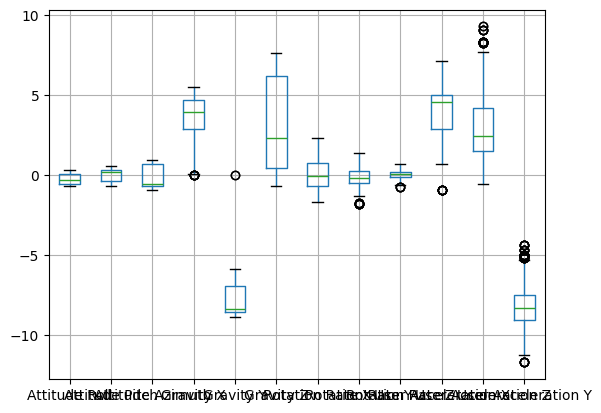

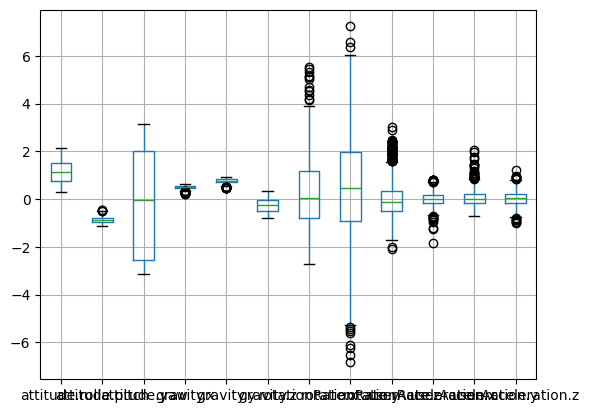

In [29]:
# clone the data1 and data2
data1_clone = data1.copy()
data2_clone = data2.copy()

# drop user acceleration z
# data1_clone = data1_clone.drop(columns=['User Acceleration X','User Acceleration Z', 'Gravity Z', 'Gravity X', 'Rotation Rate Z', 'Rotation Rate Y', 'Rotation Rate X'])

# boxplot
data1_clone.boxplot()
plt.show()

data2_clone.boxplot()
plt.show()

In [30]:
# multiply data1 with constant to fit data2
def fit_data(data1_means, data2_means):
    constants = []
    for i in range(len(data1_means)):
        constants.append(data2_means[i] / data1_means[i])
    return constants

In [31]:
constants = fit_data(data1_mean, data2_mean)
print(constants)

[-4.365773443394101, -54.41323957653783, 0.6968203587335142, 0.136588954952241, -0.09604518816954369, -0.08707225978969914, 5.4562065151808135, -3.400095555606604, 0.09906699814009713, 0.001828595069585254, 0.016005308523111047, -0.0024931627536205155]


C:\Users\rayha\AppData\Local\Temp\ipykernel_24452\4027147284.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  constants.append(data2_means[i] / data1_means[i])


In [32]:
# c sit
csit = [-3.4514602950238413, 1.5113482974975188, 0.04506911694138332, 0.08481774081897564, -0.09929570045713661, -0.1052114951314593, -0.06962702815752816, 0.9220802908586258, 6.064459319103737, 0.0008315096586496537, 0.0004046852066223911, 0.0021323793348923844]


# multiply data1 with constants
data1_fit = data1 * constants

# find mean of each column
data1_fit_mean = data1_fit.mean()

In [33]:
# compare mean of data1_fit and data2
print(data1_fit_mean)
print(data2_mean)

Attitude Roll          1.1454
Attitude Pitch        -0.8695
Attitude Azimuth      -0.1352
Gravity X              0.5018
Gravity Y              0.7563
Gravity Z             -0.2707
Rotation Rate X        0.2675
Rotation Rate Y        0.3848
Rotation Rate Z        0.0032
User Acceleration X    0.0073
User Acceleration Z    0.0474
User Acceleration Y    0.0206
dtype: float64
attitude.roll         1.1454
attitude.pitch       -0.8695
attitude.yaw         -0.1352
gravity.x             0.5018
gravity.y             0.7563
gravity.z            -0.2707
rotationRate.x        0.2675
rotationRate.y        0.3848
rotationRate.z        0.0032
userAcceleration.x    0.0073
userAcceleration.y    0.0474
userAcceleration.z    0.0206
dtype: float64


In [34]:
# Check head
data1_fit.head()

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Z,User Acceleration Y
0,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0465,0.0222,-0.0001,0.0092,0.0081,0.0218
1,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0465,0.0222,-0.0001,0.0092,0.0081,0.0218
2,-0.0000,-0.0000,0.0000,0.6625,0.8172,-0.0434,0.0465,0.0222,-0.0001,0.0092,0.0081,0.0218
3,-0.0000,-0.0000,0.0000,0.6625,0.8172,-0.0434,0.0378,0.0041,0.0001,0.0092,0.0078,0.0218
4,-0.0000,-0.0000,0.0000,0.6625,0.8172,-0.0434,0.0378,0.0041,0.0001,0.0092,0.0078,0.0218


In [35]:
# Check head
data2.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.8385,-0.9016,0.1897,0.4613,0.7843,-0.4147,0.1272,2.8332,-0.2272,-0.0975,-0.0118,0.0794
1,0.9012,-0.9003,0.1778,0.4872,0.7835,-0.3856,0.0768,4.1651,-0.2816,0.3756,0.4922,0.4497
2,0.9931,-0.9150,0.1857,0.5109,0.7925,-0.3330,-0.7941,3.8792,-0.4881,0.0616,0.2608,0.4896
3,1.0295,-0.9219,0.1711,0.5179,0.7968,-0.3113,0.7019,1.7288,-0.5390,-0.1080,0.1337,-0.0242
4,1.0520,-0.9279,0.1562,0.5207,0.8003,-0.2973,-0.2339,2.0310,-0.4498,-0.0254,-0.0955,0.2760


In [19]:
# Set pandas float format
pd.options.display.float_format = '{:.4f}'.format

# check range of each column of data 1
data1_range = data1_fit.max() - data1_fit.min()

# print full range of each column without exponential
print(data1_range)

Attitude Roll         3.3360
Attitude Pitch        1.9078
Attitude Azimuth      0.0843
Gravity X             0.4659
Gravity Y             0.8821
Gravity Z             0.8728
Rotation Rate X       0.2788
Rotation Rate Y       2.9390
Rotation Rate Z       8.5014
User Acceleration X   0.0067
User Acceleration Z   0.0040
User Acceleration Y   0.0157
dtype: float64


In [19]:
data2_range = data2.max() - data2.min()
data2_range

attitude.roll        0.2080
attitude.pitch       0.2775
attitude.yaw         0.2801
gravity.x            0.1909
gravity.y            0.2608
gravity.z            0.1075
rotationRate.x       1.3274
rotationRate.y       0.7379
rotationRate.z       1.3023
userAcceleration.x   0.4380
userAcceleration.y   0.2358
userAcceleration.z   0.2719
dtype: float64

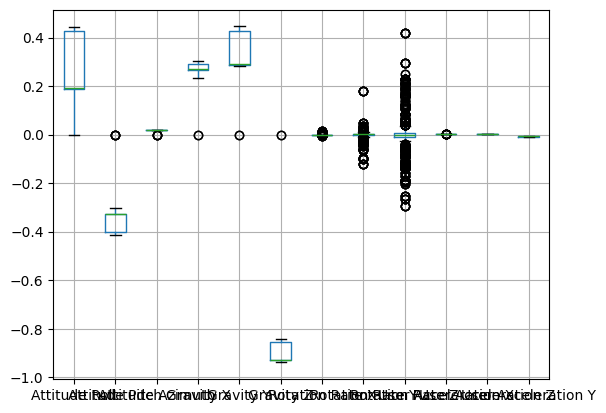

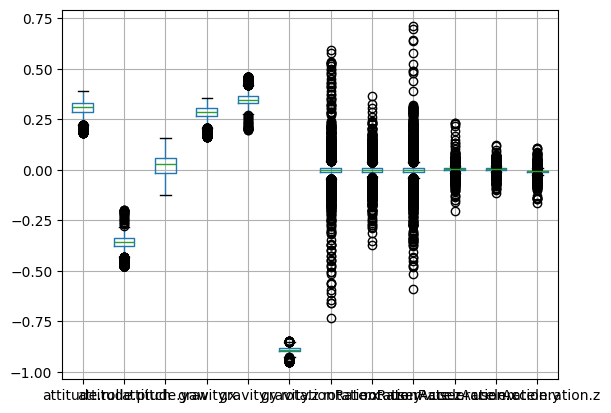

In [20]:
# box plot data1_fit and data2
# data1_fit = data1_fit.drop(columns=['User Acceleration Z'])
data1_fit.boxplot()
plt.show()

data2.boxplot()
plt.show()

In [21]:
# dropping outliers of data1_fit
# drop max and minimum values of gravity x of data1_fit 
data1_fit = data1_fit.drop(data1_fit[data1_fit['Gravity X'] == data1_fit['Gravity X'].max()].index)
data1_fit = data1_fit.drop(data1_fit[data1_fit['Gravity X'] == data1_fit['Gravity X'].min()].index)

In [118]:
data1_fit = data1_fit.drop(data1_fit[data1_fit['User Acceleration X'] == data1_fit['User Acceleration X'].max()].index)
data1_fit = data1_fit.drop(data1_fit[data1_fit['User Acceleration X'] == data1_fit['User Acceleration X'].min()].index)

In [121]:
# drop gravity z above -0.75
data1_fit = data1_fit.drop(data1_fit[data1_fit['Gravity Z'] > -0.75].index)


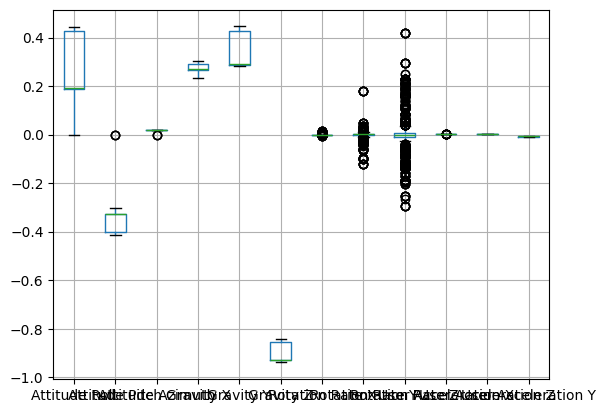

In [24]:
# box plot again
data1_fit.boxplot()
plt.show()

In [36]:
# export data1_fit to csv
data1_fit.to_csv('android_data/testing.csv', sep=',', index=False)